In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler




In [2]:
# Load your data (replace 'your_data.csv' with your file path)
try:
    data = pd.read_csv('C:/Users/abdulssekyanzi/EDA Dataset.csv/100.csv')
except FileNotFoundError:
    print("Error: your_data.csv not found.")
    exit()

def create_target(row):
    if row['MLII'] > 0.2 and row['V5'] < -0.1:
        return 1  # Example: Condition 1
    else:
        return 0  # Example: Condition 0

data['target'] = data.apply(create_target, axis=1)

data = data.drop(['Unnamed: 0', 'time_ms'], axis=1)

if 'target' not in data.columns:
    print("Error: No target column found. Please add a target column to your dataset.")
    exit()

X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] #get probabilities for ROC/AUC



In [3]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0) #handles division by zero
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9956
Precision: 0.7058
Recall: 0.6819
F1-score: 0.6936
ROC AUC: 0.9982

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    129057
           1       0.71      0.68      0.69       943

    accuracy                           1.00    130000
   macro avg       0.85      0.84      0.85    130000
weighted avg       1.00      1.00      1.00    130000


Confusion Matrix:
 [[128789    268]
 [   300    643]]


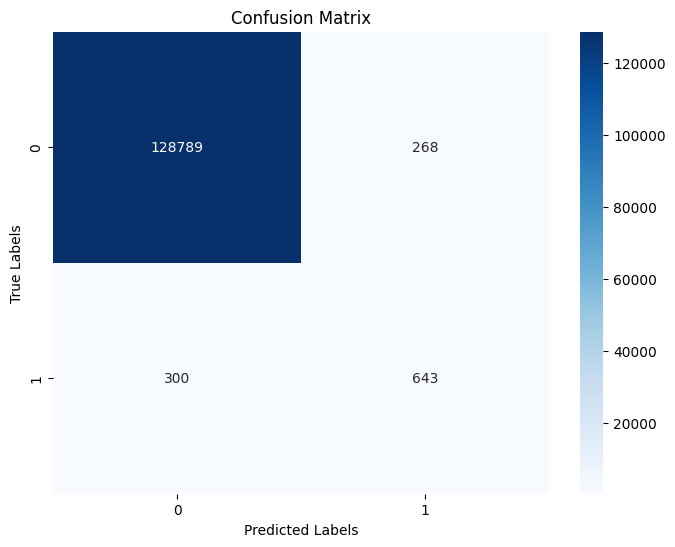

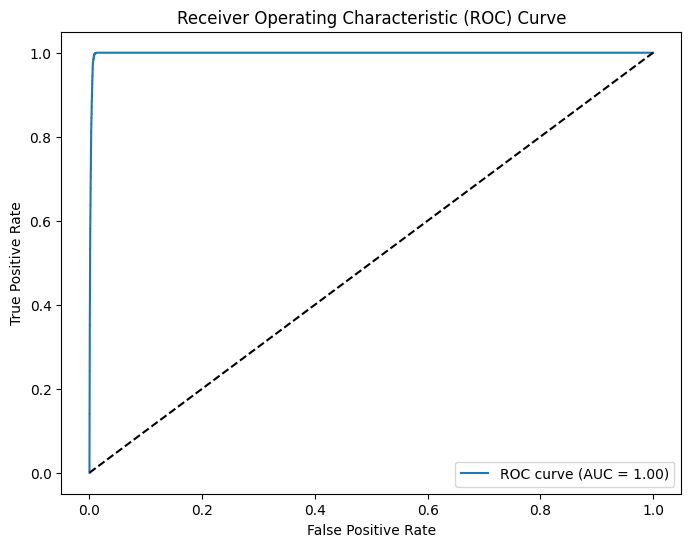

In [4]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()